**To do**
* readme

In [15]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../mlp-general")
from mlp import MLP

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
nn = MLP(3, [100, 100])
nn.load_data('../examples/ANN-input-data.csv', 'TRIMER', ['IP', 'EA', 'GAP'])
nn.fingerprint(bits=2048, rad=2, test_frac=0.3)

In [16]:
nn.build_network(dropout=0.2)
nn.train(learning_rate=0.01, batch_size=32, epochs=50)
y, pred = nn.evaluate()

Epoch 1/50
32173/32173 [==============================] - 6s 199us/step - loss: 0.4994
Epoch 2/50
32173/32173 [==============================] - 6s 186us/step - loss: 0.2023
Epoch 3/50
32173/32173 [==============================] - 5s 163us/step - loss: 0.1743
Epoch 4/50
32173/32173 [==============================] - 5s 145us/step - loss: 0.1617
Epoch 5/50
32173/32173 [==============================] - 5s 154us/step - loss: 0.1557
Epoch 6/50
32173/32173 [==============================] - 5s 162us/step - loss: 0.1503
Epoch 7/50
32173/32173 [==============================] - 5s 149us/step - loss: 0.1452
Epoch 8/50
32173/32173 [==============================] - 5s 144us/step - loss: 0.1433
Epoch 9/50
32173/32173 [==============================] - 5s 148us/step - loss: 0.1392
Epoch 10/50
32173/32173 [==============================] - 5s 148us/step - loss: 0.1365
Epoch 11/50
32173/32173 [==============================] - 6s 180us/step - loss: 0.1339
Epoch 12/50
32173/32173 [================

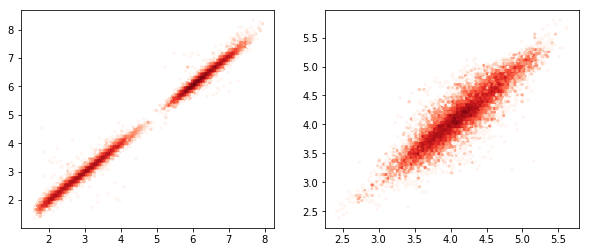

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pot_pred = np.vstack([pred[:,0], pred[:,1]])
gap_pred = pred[:,2]
pot_test = np.vstack([y[:,0], y[:,1]])
gap_test = y[:,2]

ax[0].hexbin(pot_pred, pot_test, mincnt=1, cmap='Reds', norm=LogNorm())
ax[1].hexbin(gap_pred, gap_test, mincnt=1, cmap='Reds', norm=LogNorm())
plt.show()